In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#### Loading Data from https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data

In [108]:
df = pd.read_csv('complaints.csv')
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2013-06-04,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,MO,64834.0,NaN,NaN,Web,2013-06-05,Closed with explanation,Yes,Yes,423759
1,2016-12-27,Bank account or service,Checking account,"Account opening, closing, or management",NaN,I had a checking account with US Bank that I r...,Company has responded to the consumer and the ...,U.S. BANCORP,NV,89139.0,NaN,Consent provided,Web,2016-12-27,Closed with monetary relief,Yes,No,2264736
2,2016-09-27,Bank account or service,Checking account,Problems caused by my funds being low,NaN,I have a checking and savings account with Wel...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NJ,8098.0,NaN,Consent provided,Web,2016-09-27,Closed with explanation,No,No,2133127
3,2016-02-02,Credit card,NaN,Customer service / Customer relations,NaN,I recently received an email from Bank of Amer...,Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,7901.0,Older American,Consent provided,Web,2016-02-02,Closed with explanation,Yes,Yes,1768930
4,2015-11-30,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,My brother XXXX XXXX XXXX is XXXX from a XXXX ...,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CO,80127.0,NaN,Consent provided,Web,2015-11-30,Closed with explanation,Yes,No,1676226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209425,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133.0,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
209426,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312.0,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
209427,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,3260.0,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
209428,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,90049.0,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


### Exploratory Data Analysis

In [109]:
linebreak = '------------------' 

#Check Shape
print(linebreak*3)
print("Shape: ")
print(df.shape)
print(linebreak*3)
    
#Check Feature Names
print("Column Names: ")
print(df.columns)
print(linebreak*3)
    
#Check types, missing, memory
print("Data Types, Missing Data, Memory: ")
print(df.info())
print(linebreak*3)

------------------------------------------------------
Shape: 
(209430, 18)
------------------------------------------------------
Column Names: 
Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
------------------------------------------------------
Data Types, Missing Data, Memory: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209430 entries, 0 to 209429
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 209430 non-null  object
 1   Product                       209430 non-null  object
 2   Sub-product                  

In [110]:
#identifying the null values
df.isna().sum()

Date received                        0
Product                              0
Sub-product                      43677
Issue                                0
Sub-issue                       198877
Consumer complaint narrative    179195
Company public response         149283
Company                              0
State                             2224
ZIP code                          2220
Tags                            180855
Consumer consent provided?      156666
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

In [111]:
#to remove null values in 'Consumer disputed?'

df = df.dropna(subset=['Consumer disputed?'])
df.shape

(209430, 18)

In [112]:
df['Company'].value_counts().sort_values(ascending=False)

BANK OF AMERICA, NATIONAL ASSOCIATION    65992
WELLS FARGO & COMPANY                    53693
JPMORGAN CHASE & CO.                     42630
CITIBANK, N.A.                           34768
U.S. BANCORP                             12347
Name: Company, dtype: int64

In [113]:
#Banks with most number of complaints

banks = ['BANK OF AMERICA, NATIONAL ASSOCIATION', 'WELLS FARGO & COMPANY','JPMORGAN CHASE & CO.', 'CITIBANK, N.A.' , 'U.S. BANCORP']
complaints = df[(df['Company'].isin(banks))]
complaints.to_csv('/Users/snehabhattacharya/Desktop/NYU/Sem 3/Business Analytics/Project/Complaints Data/complaints.csv', index=False)
complaints

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2013-06-04,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,MO,64834.0,NaN,NaN,Web,2013-06-05,Closed with explanation,Yes,Yes,423759
1,2016-12-27,Bank account or service,Checking account,"Account opening, closing, or management",NaN,I had a checking account with US Bank that I r...,Company has responded to the consumer and the ...,U.S. BANCORP,NV,89139.0,NaN,Consent provided,Web,2016-12-27,Closed with monetary relief,Yes,No,2264736
2,2016-09-27,Bank account or service,Checking account,Problems caused by my funds being low,NaN,I have a checking and savings account with Wel...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NJ,8098.0,NaN,Consent provided,Web,2016-09-27,Closed with explanation,No,No,2133127
3,2016-02-02,Credit card,NaN,Customer service / Customer relations,NaN,I recently received an email from Bank of Amer...,Company chooses not to provide a public response,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,7901.0,Older American,Consent provided,Web,2016-02-02,Closed with explanation,Yes,Yes,1768930
4,2015-11-30,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,My brother XXXX XXXX XXXX is XXXX from a XXXX ...,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CO,80127.0,NaN,Consent provided,Web,2015-11-30,Closed with explanation,Yes,No,1676226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209425,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133.0,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
209426,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312.0,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
209427,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,3260.0,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
209428,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,90049.0,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


(array([53693.,     0., 12347.,     0.,     0., 65992.,     0., 42630.,
            0., 34768.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

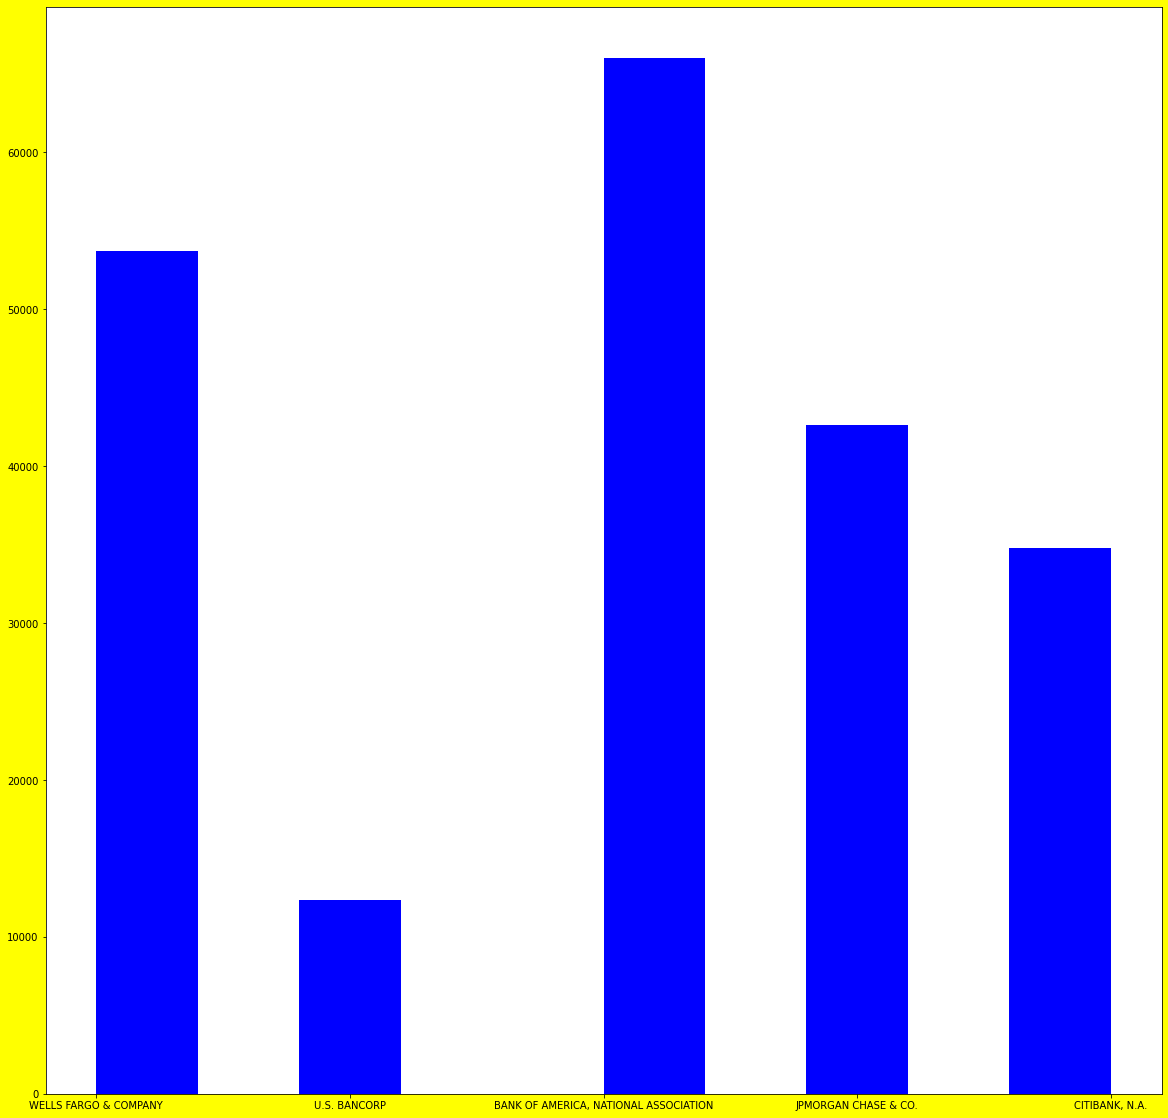

In [114]:
plt.figure(figsize=(20, 20), facecolor='yellow',edgecolor='blue')
plt.hist(complaints['Company'], histtype='bar', align='mid', label='str', color='blue')

### Predicting 'Consumer Disputed?'

We look at the distribution of how many people disputed the complaint's resolution versus how many did not. 

In [115]:
#Total number of disputes

complaints['Consumer disputed?'].value_counts().sum()

209430

This is the number of rows after dropping null values from 'Consumer Disputed?'

In [116]:
# Split between Yes and No

complaints['Consumer disputed?'].value_counts()

No     164454
Yes     44976
Name: Consumer disputed?, dtype: int64

In [117]:
# To see the percentage of Yes and No

complaints['Consumer disputed?'].value_counts(normalize=True)

No     0.785246
Yes    0.214754
Name: Consumer disputed?, dtype: float64

***To see the total cost that would have occured without our model:***

We multiply the total number of customer disputes with $190, which give us $39,791,700.

This means that we would have spent $39.79 mn USD if we did not use a model.


In [118]:
# Next, for cleanliness we change the column type for 'Consumer Disputed' from string to category

complaints['Consumer disputed?'] = complaints['Consumer disputed?'].astype('category')

So we have an imbalanced dataset as only about 21% is in the `Yes` class.  This means we should consider rebalancing the training dataset using a technique such as SMOTE.  But we will do that after doing the train-test split.  But first, we need to think about what in our data should be the predictor variables, ie, what should be included as a feature in `X`.

## Deciding the feature set      
To do that, let us look at the dataset again.  And refer to the data-dictionary in the Word document for the project.

|Field name  |Description  |Can it be a feature?  |
|------------  |------------  |------------  |
|Date received  |The date the CFPB received the complaint. For example, “05/25/2013.”  |Not a feature  |
|Product  |The type of product the consumer identified in the complaint. For example, “Checking or savings account” or “Student loan.”  |Yes  |
|Sub-product  |The type of sub-product the consumer identified in the complaint. For example, “Checking account” or “Private student loan.”  |Yes  |
|Issue  |The issue the consumer identified in the complaint. For example, “Managing an account” or “Struggling to repay your loan.”  |Yes  |
|Sub-issue  |The sub-issue the consumer identified in the complaint. For example, “Deposits and withdrawals” or “Problem lowering your monthly payments.”  |Yes  |
|Consumer complaint narrative  |Consumer complaint narrative is the consumer-submitted description of “what happened” from the complaint. Consumers must opt-in to share their narrative. We will not publish the narrative unless the consumer consents, and consumers can opt-out at any time. The CFPB takes reasonable steps to scrub personal information from each complaint that could be used to identify the consumer.  |Maybe, if we can convert text to some vector form  |
|Company public response  |The company’s optional, public-facing response to a consumer’s complaint. Companies can choose to select a response from a pre-set list of options that will be posted on the public database. For example, “Company believes complaint is the result of an isolated error.”  |Yes  |
|Company  |The complaint is about this company. For example, “ABC Bank.”  |Yes  |
|State  |The state of the mailing address provided by the consumer.  |Yes  |
|ZIP code  |The mailing ZIP code provided by the consumer. This field may: i) include the first five digits of a ZIP code; ii) include the first three digits of a ZIP code (if the consumer consented to publication of their complaint narrative); or iii) be blank (if ZIP codes have been submitted with non-numeric values, if there are less than 20,000 people in a given ZIP code, or if the complaint has an address outside of the United States).  |Yes  |
|Tags  |Data that supports easier searching and sorting of complaints submitted by or on behalf of consumers. For example, complaints where the submitter reports the age of the consumer as 62 years or older are tagged “Older American.” Complaints submitted by or on behalf of a servicemember or the spouse or dependent of a servicemember are tagged “Servicemember.” Servicemember includes anyone who is active duty, National Guard, or Reservist, as well as anyone who previously served and is a veteran or retiree.  |Yes  |
|Consumer consent provided?  |Identifies whether the consumer opted in to publish their complaint narrative. We do not publish the narrative unless the consumer consents, and consumers can opt-out at any time.  |Yes  |
|Submitted via  |How the complaint was submitted to the CFPB. For example, “Web” or “Phone.”  |Yes  |
|Date sent to company  |The date the CFPB sent the complaint to the company.  |Not relevant  |
|Company response to consumer  |This is how the company responded. For example, “Closed with explanation.”  |Yes  |
|Timely response?  |Whether the company gave a timely response. For example, “Yes” or “No.”  |Yes  |
|Consumer disputed?  |Whether the consumer disputed the company’s response.  |This the Target  |
|Complaint ID  |The unique identification number for a complaint.  |Not a feature  |

As 'Consumer complaint narrative' might need to be converted to some vector form, we will look into this later.

In [119]:
X = complaints[[ 'Product', 'Sub-product', 'Issue', 'Sub-issue',
        'Company public response', 'Company',
       'State',  'Tags',
       'Submitted via',  'Company response to consumer',
       'Timely response?']]

In [120]:
# Let us check if we have any missing values in our reduced dataset X

print(len(X)) # Number of rows before dropna()
print(len(X.dropna())) # Number of rows after dropna() 

209430
592


If we were to drop `NaN` values, we would be left with very few rows.  That means we need to think harder about `NaN` values.  

To do that, let us look at which columns are missing values.  

In [121]:
X['Sub-product'].unique()

array(['Conventional fixed mortgage', 'Checking account', nan,
       'FHA mortgage', 'Vehicle loan',
       'Home equity loan or line of credit',
       'Other (i.e. phone, health club, etc.)',
       'Domestic (US) money transfer', 'Reverse mortgage',
       'Other bank product/service', 'Credit card',
       'Conventional adjustable mortgage (ARM)', 'Other mortgage',
       'Non-federal student loan', 'Check cashing', 'Second mortgage',
       'Mortgage', 'Savings account', 'Installment loan',
       'Cashing a check without an account', 'VA mortgage',
       'Vehicle lease', 'Federal student loan servicing',
       'International money transfer', '(CD) Certificate of deposit',
       'General purpose card', 'Gift or merchant card', 'I do not know',
       'Personal line of credit', 'Auto', 'Payday loan',
       'Federal student loan', 'Other special purpose card', 'Pawn loan',
       'Foreign currency exchange', 'Title loan', 'Mobile wallet',
       'Traveler’s/Cashier’s checks', '

In [122]:
X['Sub-issue'].unique()

array([nan, 'Frequent or repeated calls',
       'Talked to a third party about my debt',
       'Trouble with how payments are handled',
       'Keep getting calls about my loan',
       "Don't agree with fees charged", 'Debt was paid',
       "Can't decrease my monthly payments",
       'Right to dispute notice not received',
       'Indicated committed crime not paying',
       'Debt resulted from identity theft',
       'Report improperly shared by CRC',
       'Received bad information about my loan',
       'Not given enough info to verify debt',
       'Attempted to collect wrong amount',
       'Debt was discharged in bankruptcy',
       'Not disclosed as an attempt to collect',
       'Having problems with customer service',
       "Can't get flexible payment options", 'Debt is not mine',
       'Used obscene/profane/abusive language',
       'Need information about my balance/terms',
       'Information is not mine', 'Contacted me after I asked not to',
       "Indicated shou

In [123]:
X['State'].unique()

array(['MO', 'NV', 'NJ', 'CO', 'CA', 'WI', 'NH', 'IL', 'TX', 'AZ', 'NY',
       'OH', 'MD', 'NC', 'VA', 'FL', 'KY', 'TN', 'SC', 'GA', 'DE', 'CT',
       'ID', 'DC', 'RI', nan, 'MI', 'PA', 'WA', 'WV', 'OK', 'OR', 'MA',
       'IA', 'NM', 'AL', 'MN', 'HI', 'ME', 'IN', 'MS', 'MP', 'KS', 'AR',
       'SD', 'VT', 'UT', 'PR', 'LA', 'NE', 'MT', 'AE', 'AK', 'WY', 'AP',
       'VI', 'ND', 'AS', 'MH', 'GU', 'FM', 'PW', 'AA'], dtype=object)

In [124]:
X['Company public response'].unique()

array([nan,
       'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company chooses not to provide a public response',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes the complaint is the result of a misunderstanding',
       'Company believes complaint relates to a discontinued policy or procedure',
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company'],
      dtype=object)

In [125]:
print(X['Tags'].unique())
X['Tags'].value_counts()

[nan 'Older American' 'Servicemember' 'Older American, Servicemember']


Older American                   18757
Servicemember                     7410
Older American, Servicemember     2408
Name: Tags, dtype: int64

## Dealing with missing data  
It is clear that all of these fields that have missing data are categorical, or string, and we cannot use any numerical imputation method to fill the missing values. 

What we could do to remove the NaNs is to put the text 'missing' in its place. That would mean that all missing items would be treated as a category that we humans understand to be missing, but for the machine it is just another category called 'missing'.  

In [126]:
X = X.fillna('missing')
X.dropna().shape

(209430, 11)

## Data Preparation
We see that there are no cells that have NaNs any more after our operations above.  So it is safe to proceed.

In [127]:
#convert all the X observations into numbers

X = pd.get_dummies(X)

In [128]:
# Let us see what X looks like

print('X has the shape ',X.shape)

X

X has the shape  (209430, 313)


,Product_Bank account or service,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_No,Timely response?_Yes
0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209425,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
209426,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
209427,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
209428,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1


**Let us get our _y_ variable** 

In [129]:
y = complaints['Consumer disputed?']

In [130]:
#But y contains text, and we need to have 0s and 1s.  We can try to use LabelEncoder to do that

from sklearn import preprocessing

labelE = preprocessing.LabelEncoder()
y = labelE.fit_transform(complaints['Consumer disputed?'])
print(labelE.classes_)
print(labelE.inverse_transform(list(set(y))))

labels = dict(zip(list(set(y)), labelE.inverse_transform(list(set(y)))))
print("\nLabel mapping is:", labels)

['No' 'Yes']
['No' 'Yes']

Label mapping is: {0: 'No', 1: 'Yes'}


In [131]:
y

array([1, 0, 0, ..., 0, 0, 0])

In [132]:
# Let us do a value_counts() to check how many of each category. We convert it to a Pandas dataframe first.

print(pd.DataFrame(y).value_counts(), '\n')
print(pd.DataFrame(y).value_counts(normalize=True))

0    164454
1     44976
dtype: int64 

0    0.785246
1    0.214754
dtype: float64


## Train-Test split 

We have our `X` and `y` defined.  Now let us do the train-test split

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
# We check the shape of our X and y 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(167544, 313)
(167544,)
(41886, 313)
(41886,)


## Dealing with imbalanced data  

Since we have an imbalanced dataset, we should try to do something to oversample the minority category, or undersample the majority.  We can undersample the data since it is large using Random Undersampling.

#### Random Undersampling

In [135]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

In [136]:
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X, y)

In [137]:
# Let us check if the dataset is balanced
# just checking that the '1' category is exactly 50% of the training set

y_train.sum()/len(y_train) 

0.5

In [138]:
X_train.shape

(89952, 313)

In [139]:
# Let us look at what y_train looks like, and the value_counts()

pd.DataFrame(y_train).value_counts()

0    44976
1    44976
dtype: int64

In [140]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(209430, 313)
(89952, 313)
(41886, 313)


**Now everything is set up, we have X_train, y_train, X_test, y_test and a perfectly balanced dataset.  We can now feed it to a model of our choice, and look at the results.**  

## Fit a model using XGBoost

In [141]:
%%time
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

CPU times: user 2min 1s, sys: 3.82 s, total: 2min 5s
Wall time: 20.1 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [142]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.53      0.66     32969
           1       0.28      0.67      0.39      8917

    accuracy                           0.56     41886
   macro avg       0.57      0.60      0.52     41886
weighted avg       0.73      0.56      0.60     41886



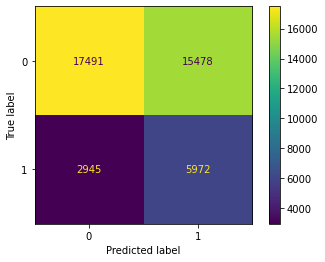

In [143]:
# Check the classification report and the confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score
from tqdm import tqdm

print(classification_report(y_true = y_test, y_pred = pred))

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [144]:
# Let us look at label mappings to check what 0 and 1 mean
# Looks like "0" means NoDispute, and "1" means "Dispute"

print("Label mapping is:", labels)

Label mapping is: {0: 'No', 1: 'Yes'}


## Calculating Total Cost in Dollars    
The confusion matrix has 4 cells.  Each one has a different 'cost'.  Let us look at each:

> First cell (yellow cell, 1st row, 1st col): True NoDispute: Model predicted NoDispute, and customer did not dispute either.
> Here, we know we will pay $100 as "On average, it costs the banks \\$100 to resolve, respond to and close a complaint that is not disputed".

> Second cell (green cell, 1st row 2nd col): False Dispute: Model predicted Dispute and customer did not dispute.
> Here, we will end up investigating and performing additional due diligence at the cost of \\$90 over and above the $100 that has to be spent in any case.  So the cost of the entries in this cell are \\$190.

> Third cell (purple cell, 2nd row 1st col): False NoDispute: Model predicted NoDispute, but customer disputed.
> Here we will spend an extra \\$500 in addition to the \\$100, so there will be a total cost of \\$600.

> Fourth cell (blue cell, 2nd row, 2nd col): Model predicted Dispute, and customer actually disputed too.  
> Here we will spend the \\$90 for the cost of additional due diligence over and above the \\$100 that needs to be spent anyway.  So the total cost of any cases in this cell will be \\$190

Let us calculate the total cost based on our confusion matrix.  The confusion matrix has the false positives and the false negatives in the cells outside the main diagonal.  

In [145]:
# Cost when model predicts dispute and actually disputed
True_NoDispute_Cost = 100 * cm[0, 0]

# Cost when model predicts dispute and no actual dispute 
False_Dispute_Cost = 190 * cm[0,1]

# Cost when model predicts NoDispute and actually disputed
False_NoDispute_Cost = 600 * cm[1,0]

# Cost when model predicts NoDispute correctly
True_Dispute_Cost = 190 * cm[1,1]

In [146]:
Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
print(f"Total_cost in Dollars before changing the threshold: {Total_cost}")

Total_cost in Dollars before changing the threshold: 7591600


Confusion Matrix : 
 [[  106 32863]
 [    0  8917]]
Test accuracy =  0.21541803944038582
              precision    recall  f1-score   support

           0       1.00      0.00      0.01     32969
           1       0.21      1.00      0.35      8917

    accuracy                           0.22     41886
   macro avg       0.61      0.50      0.18     41886
weighted avg       0.83      0.22      0.08     41886



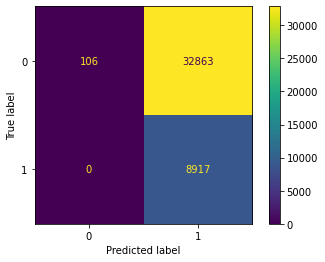

In [147]:
# Set threshold for identifying class 1
threshold = 0.1

# Create predictions.  Note that predictions give us probabilities, not classes!
pred_prob = model_xgb.predict_proba(X_test)

# We drop the probabilities for class 0, and keep just the second column
pred_prob = pred_prob[:,1]

# Convert probabilities to 1s and 0s based on threshold for Class 1
pred = (pred_prob>threshold).astype(int)

# confusion matrix
cm = confusion_matrix(y_test, pred)
print ("Confusion Matrix : \n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, pred))
print(classification_report(y_true = y_test, y_pred = pred))

So we see that recall has gone up to 90% from a lower number earlier.

In [148]:
# See what predicted probabilities look like
pred_prob

array([0.5829874 , 0.41657645, 0.54077727, ..., 0.5668447 , 0.22026256,
       0.21916826], dtype=float32)

**Calculating Total Cost in Dollars**  

Let us calculate the total cost based on our confusion matrix.  Just like we did before, no change to the logic.

In [149]:
# Cost when model predicts dispute and actually disputed
True_NoDispute_Cost = 100 * cm[0, 0]

# Cost when model predicts dispute and no actual dispute 
False_Dispute_Cost = 190 * cm[0,1]

# Cost when model predicts NoDispute and actually disputed
False_NoDispute_Cost = 600 * cm[1,0]

# Cost when model predicts NoDispute correctly
True_Dispute_Cost = 190 * cm[1,1]

In [150]:
Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
print(f"Total_cost in Dollars when threshold is 0.1 for Class 1 : {Total_cost}")

Total_cost in Dollars when threshold is 0.1 for Class 1 : 7948800


In [151]:
%%time
# Set threshold for identifying class 1
threshold = 0.0001
appended_data = []

for threshold in tqdm(np.arange(0,1,.01)):
    # Create predictions.  Note that predictions give us probabilities, not classes!
    pred_prob = model_xgb.predict_proba(X_test)

    # We drop the probabilities for class 0, and keep just the second column
    pred_prob = pred_prob[:,1]

    # Convert probabilities to 1s and 0s based on threshold
    pred = (pred_prob>threshold).astype(int)

    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    
    # accuracy score of the model
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred,zero_division=0)
    recall = recall_score(y_test, pred)
    
    # Cost when model predicts dispute and actually disputed
    True_NoDispute_Cost = 100 * cm[0, 0]

    # Cost when model predicts dispute and no actual dispute 
    False_Dispute_Cost = 190 * cm[0,1]

    # Cost when model predicts NoDispute and actually disputed
    False_NoDispute_Cost = 600 * cm[1,0]

    # Cost when model predicts NoDispute correctly
    True_Dispute_Cost = 190 * cm[1,1]
    
    Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
    Total_cost
    
    data = pd.DataFrame({'threshold':[threshold], 'accuracy': [accuracy], 
                         'precision':[precision], 'recall':[recall],
                         'True_NoDispute_Cost':[True_NoDispute_Cost], 
                         'False_Dispute_Cost':[False_Dispute_Cost], 
                         'False_NoDispute_Cost':[False_NoDispute_Cost],
                         'True_Dispute_Cost':[True_Dispute_Cost],
                         'Total_cost':[Total_cost]})
    appended_data.append(data)
    
    

appended_data = pd.concat(appended_data)    

appended_data.reset_index()

100%|██████████| 100/100 [00:06<00:00, 15.65it/s]

CPU times: user 29.8 s, sys: 7.84 s, total: 37.6 s
Wall time: 6.46 s


,index,threshold,accuracy,precision,recall,True_NoDispute_Cost,False_Dispute_Cost,False_NoDispute_Cost,True_Dispute_Cost,Total_cost
0,0,0.00,0.212887,0.212887,1.0,0,6264110,0,1694230,7958340
1,0,0.01,0.212959,0.212903,1.0,300,6263540,0,1694230,7958070
2,0,0.02,0.213269,0.212969,1.0,1600,6261070,0,1694230,7956900
3,0,0.03,0.213460,0.213009,1.0,2400,6259550,0,1694230,7956180
4,0,0.04,0.213508,0.213020,1.0,2600,6259170,0,1694230,7956000
...,...,...,...,...,...,...,...,...,...,...
95,0,0.95,0.787113,0.000000,0.0,3296900,0,5350200,0,8647100
96,0,0.96,0.787113,0.000000,0.0,3296900,0,5350200,0,8647100
97,0,0.97,0.787113,0.000000,0.0,3296900,0,5350200,0,8647100
98,0,0.98,0.787113,0.000000,0.0,3296900,0,5350200,0,8647100


<Axes: xlabel='threshold', ylabel='Total_cost'>

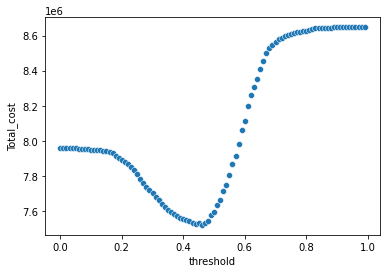

In [152]:
# appended_data.to_excel('temp.xlsx')

sns.scatterplot(data = appended_data, y = 'Total_cost', x = 'threshold')

In [153]:
print(round(appended_data[appended_data.Total_cost == appended_data.Total_cost.min()].transpose(),3))

                                0
threshold                   0.460
accuracy                    0.468
precision                   0.261
recall                      0.817
True_NoDispute_Cost   1229800.000
False_Dispute_Cost    3927490.000
False_NoDispute_Cost   978000.000
True_Dispute_Cost     1384530.000
Total_cost            7519820.000


So the minimum cost occurs at a threshold of 0.45, and the cost is $7.56 mm.

In [154]:
# AUC calculation

from sklearn import metrics

metrics.roc_auc_score(y_test, pred_prob)

0.6447539476841868

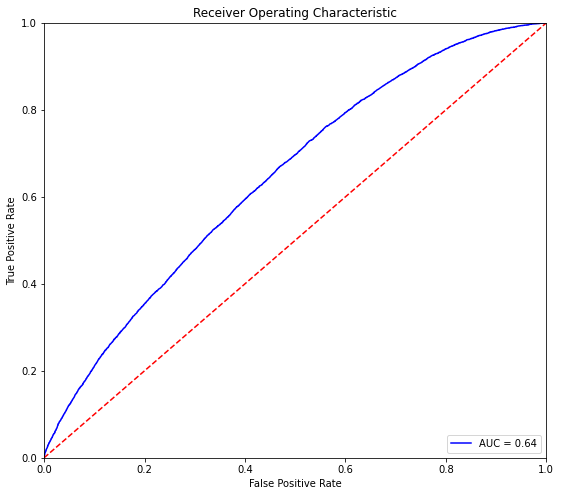

In [155]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [156]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True)

,TPR,FPR,Threshold
0,1.000000,1.000000,0.007574
1,1.000000,0.999151,0.058403
2,1.000000,0.998696,0.075748
3,1.000000,0.998665,0.079022
4,1.000000,0.998483,0.080211
...,...,...,...
13419,0.000561,0.000152,0.880191
13420,0.000449,0.000121,0.880579
13421,0.000000,0.000121,0.889675
13422,0.000000,0.000030,0.944476


## Fit a model using Neural Network

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Dealing with imbalanced data  

Since we have an imbalanced dataset, we should try to do something to oversample the minority category, or undersample the majority.  We can undersample the data since it is large using Random Undersampling.

#### Random Undersampling

In [158]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 

In [159]:
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X, y)

In [160]:
# Let us check if the dataset is balanced
# just checking that the '1' category is exactly 50% of the training set

y_train.sum()/len(y_train) 

0.5

In [161]:
X_train.shape

(89952, 313)

In [162]:
# Let us look at what y_train looks like, and the value_counts()

pd.DataFrame(y_train).value_counts()

0    44976
1    44976
dtype: int64

In [163]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(209430, 313)
(89952, 313)
(41886, 313)


In [164]:
from sklearn.model_selection import train_test_split
import sklearn

In [165]:
#Standardizing the variables

from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

# standardization of dependent variables
scaler = scale.fit(X_train)

scaled_trainX = scaler.transform(X_train)
scaled_testX = scaler.transform(X_test)

In [166]:
%%time

from sklearn.neural_network import MLPClassifier
# Fit the model
clf = MLPClassifier(activation='logistic', random_state=1, max_iter=200).fit(scaled_trainX, y_train)

#Probability estimates
prob = clf.predict_proba(scaled_testX)
prob

CPU times: user 31min 43s, sys: 41.4 s, total: 32min 24s
Wall time: 4min 33s


array([[0.66805907, 0.33194093],
       [0.42331665, 0.57668335],
       [0.26292177, 0.73707823],
       ...,
       [0.64371105, 0.35628895],
       [0.65919686, 0.34080314],
       [0.50026339, 0.49973661]])

In [167]:
#Predict using the multi-layer perceptron classifier
pred = clf.predict(scaled_testX)
pred

array([0, 1, 1, ..., 0, 0, 0])

In [168]:
#Return the mean accuracy on the given test data and labels.
accuracy = clf.score(scaled_testX, y_test)
print(f"Accuracy of Neural Network is: {accuracy*100:.2f}%")

Accuracy of Neural Network is: 61.89%


              precision    recall  f1-score   support

           0       0.90      0.58      0.71     32897
           1       0.33      0.76      0.46      8989

    accuracy                           0.62     41886
   macro avg       0.61      0.67      0.58     41886
weighted avg       0.78      0.62      0.65     41886



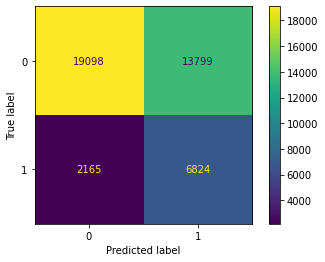

In [169]:
# Check the classification report and the confusion matrix

print(classification_report(y_true = y_test, y_pred = pred))

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [170]:
# Cost when model predicts dispute and actually disputed
True_NoDispute_Cost = 100 * cm[0, 0]

# Cost when model predicts dispute and no actual dispute 
False_Dispute_Cost = 190 * cm[0,1]

# Cost when model predicts NoDispute and actually disputed
False_NoDispute_Cost = 600 * cm[1,0]

# Cost when model predicts NoDispute correctly
True_Dispute_Cost = 190 * cm[1,1]

In [171]:
Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
print(f"Total_cost in Dollars before changing the threshold: {Total_cost}")

Total_cost in Dollars before changing the threshold: 7127170


In [172]:
%%time
# Set threshold for identifying class 1
threshold = 0.0001
appended_data = []

for threshold in tqdm(np.arange(0,1,.01)):
    # Create predictions.  Note that predictions give us probabilities, not classes!
    pred_prob = clf.predict_proba(scaled_testX)

    # We drop the probabilities for class 0, and keep just the second column
    pred_prob = pred_prob[:,1]

    # Convert probabilities to 1s and 0s based on threshold
    pred = (pred_prob>threshold).astype(int)

    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    
    # accuracy score of the model
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred,zero_division=0)
    recall = recall_score(y_test, pred)
    
    # Cost when model predicts dispute and actually disputed
    True_NoDispute_Cost = 100 * cm[0, 0]

    # Cost when model predicts dispute and no actual dispute 
    False_Dispute_Cost = 190 * cm[0,1]

    # Cost when model predicts NoDispute and actually disputed
    False_NoDispute_Cost = 600 * cm[1,0]

    # Cost when model predicts NoDispute correctly
    True_Dispute_Cost = 190 * cm[1,1]
    
    Total_cost = True_NoDispute_Cost + False_Dispute_Cost + False_NoDispute_Cost + True_Dispute_Cost
    Total_cost
    
    data = pd.DataFrame({'threshold':[threshold], 'accuracy': [accuracy], 
                         'precision':[precision], 'recall':[recall],
                         'True_NoDispute_Cost':[True_NoDispute_Cost], 
                         'False_Dispute_Cost':[False_Dispute_Cost], 
                         'False_NoDispute_Cost':[False_NoDispute_Cost],
                         'True_Dispute_Cost':[True_Dispute_Cost],
                         'Total_cost':[Total_cost]})
    appended_data.append(data)
    
    

appended_data = pd.concat(appended_data)    

appended_data.reset_index()

100%|██████████| 100/100 [00:16<00:00,  6.12it/s]

CPU times: user 1min 36s, sys: 21.5 s, total: 1min 58s
Wall time: 16.4 s


,index,threshold,accuracy,precision,recall,True_NoDispute_Cost,False_Dispute_Cost,False_NoDispute_Cost,True_Dispute_Cost,Total_cost
0,0,0.00,0.214606,0.214606,1.000000,0,6250430,0,1707910,7958340
1,0,0.01,0.229313,0.217810,1.000000,61600,6133390,0,1707910,7902900
2,0,0.02,0.239746,0.220086,0.999555,105700,6049600,2400,1707150,7864850
3,0,0.03,0.252113,0.222887,0.999333,157700,5950800,3600,1706770,7818870
4,0,0.04,0.262880,0.225368,0.998999,203100,5864540,5400,1706200,7779240
...,...,...,...,...,...,...,...,...,...,...
95,0,0.95,0.784821,0.492891,0.092558,3204100,162640,4894200,158080,8419020
96,0,0.96,0.784463,0.485818,0.074313,3219000,134330,4992600,126920,8472850
97,0,0.97,0.785418,0.500489,0.056959,3238600,97090,5086200,97280,8519170
98,0,0.98,0.785441,0.501397,0.039938,3254000,67830,5178000,68210,8568040


<Axes: xlabel='threshold', ylabel='Total_cost'>

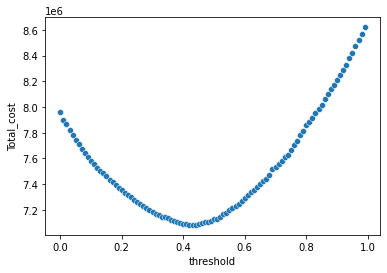

In [173]:
# appended_data.to_excel('temp.xlsx')

sns.scatterplot(data = appended_data, y = 'Total_cost', x = 'threshold')

In [174]:
print(round(appended_data[appended_data.Total_cost == appended_data.Total_cost.min()].transpose(),3))

                                0
threshold                   0.430
accuracy                    0.553
precision                   0.307
recall                      0.860
True_NoDispute_Cost   1545200.000
False_Dispute_Cost    3314550.000
False_NoDispute_Cost   755400.000
True_Dispute_Cost     1468700.000
Total_cost            7083850.000


So the minimum cost occurs at a threshold of 0.42, and the cost is $7.12 mm.

## AUC and ROC calculation

In [175]:
# AUC calculation

from sklearn import metrics

metrics.roc_auc_score(y_test, pred_prob)

0.7351563713362121

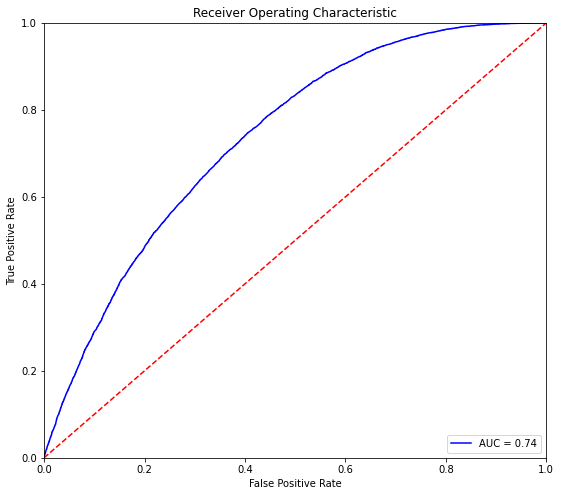

In [176]:
# Source for code below: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [177]:
pd.DataFrame({'TPR': tpr, 'FPR': fpr, 'Threshold': thresholds}).sort_values(by = ['Threshold']).reset_index(drop=True)

,TPR,FPR,Threshold
0,1.000000,1.000000,8.962198e-07
1,1.000000,0.999939,3.231176e-06
2,1.000000,0.999878,4.806555e-06
3,1.000000,0.997933,3.670212e-04
4,1.000000,0.997872,3.726859e-04
...,...,...,...
13685,0.000445,0.000061,9.999882e-01
13686,0.000445,0.000030,9.999894e-01
13687,0.000111,0.000030,9.999979e-01
13688,0.000111,0.000000,9.999985e-01


The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.